In [8]:
from charts import *

In [9]:
import importlib
importlib.reload(charts)

<module 'charts' from '/Users/victor/Dropbox/data/paternalAgeStudy/charts.py'>

In [10]:
df = pd.read_csv('cleaned2.csv')

In [11]:
df

,Party,Wingness,LGBT,BLM,Feminism,>35 kids,<35 kids,wifeLGBT,wifeBLM,wifeFeminism,Leftism,wifeLeftism
0,Republican,Right-wing,0,0,0,0,1,-1.0,-1.0,-1.0,0,0
1,Republican,Right-wing,0,0,0,0,1,-1.0,-1.0,-1.0,0,0
2,Republican,Right-wing,0,0,1,1,0,-1.0,0.5,-1.0,0,0
3,Independent,Centrist,1,1,1,0,2,0.5,0.5,0.5,1,1
4,Independent,Centrist,1,1,1,0,2,0.5,1.0,0.5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233,Democratic,Left-wing,1,1,1,2,0,0.5,1.0,1.0,1,1
234,Democratic,Left-wing,1,1,1,2,1,1.0,1.0,1.0,1,1
235,Democratic,Left-wing,1,1,1,0,2,1.0,1.0,1.0,1,1
236,Democratic,Left-wing,1,1,1,0,4,1.0,1.0,1.0,1,1


In [27]:
df2 = df[ df['>35 kids'] > 0] #>35 fathers
df3 = df[ df['<35 kids'] > 0] #<35 fathers
df2['WeightedWoke'] = df2['>35 kids'] * df2['Leftism']
df3['WeightedWoke'] = df3['<35 kids'] * df3['Leftism']
oldMean = df2['WeightedWoke'].sum() / df2['>35 kids'].sum()
oldSE = df2['Leftism'].sem()
youngMean = df3['WeightedWoke'].sum() / df3['<35 kids'].sum()
youngSE = df3['Leftism'].sem()

OVER35FATHERSWEIGHTED = oldMean
UNDER35FATHERSWEIGHTED = youngMean
OVER35FATHERSWEIGHTEDSE = oldSE * 1.96
UNDER35FATHERSWEIGHTEDSE = youngSE * 1.96

print("P(Woke|>35) = {} [{}, {}] n={}".format(oldMean, oldMean - (1.96*oldSE), oldMean + (1.96*oldSE), len(df2['Leftism'])  ))
print("P(Woke|<35) = {} [{}, {}] n={}".format(youngMean, youngMean - (1.96*youngSE), youngMean + (1.96*youngSE), len(df3['Leftism'])  ))

P(Woke|>35) = 0.39906103286384975 [0.31302803581076444, 0.48509402991693507] n=129
P(Woke|<35) = 0.4438040345821326 [0.3723188162259539, 0.5152892529383112] n=187


/var/folders/2w/sy40wmhs0zs6mfg2mnj_7qlh0000gn/T/ipykernel_41709/2926826660.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['WeightedWoke'] = df2['>35 kids'] * df2['Leftism']
/var/folders/2w/sy40wmhs0zs6mfg2mnj_7qlh0000gn/T/ipykernel_41709/2926826660.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['WeightedWoke'] = df3['<35 kids'] * df3['Leftism']


In [28]:
oldMean = df2['Leftism'].mean()
oldSE = df2['Leftism'].sem()
youngMean = df3['Leftism'].mean()
youngSE = df3['Leftism'].sem()
OVER35FATHERS = oldMean
UNDER35FATHERS = youngMean
OVER35FATHERSSE = oldSE * 1.96
UNDER35FATHERSSE = youngSE * 1.96

print("P(Woke|>35) = {} [{}, {}] n={}".format(oldMean, oldMean - (1.96*oldSE), oldMean + (1.96*oldSE), len(df2['Leftism'])  ))
print("P(Woke|<35) = {} [{}, {}] n={}".format(youngMean, youngMean - (1.96*youngSE), youngMean + (1.96*youngSE), len(df3['Leftism'])  ))

P(Woke|>35) = 0.4418604651162791 [0.35582746806319376, 0.5278934621693644] n=129
P(Woke|<35) = 0.44919786096256686 [0.3777126426063882, 0.5206830793187455] n=187


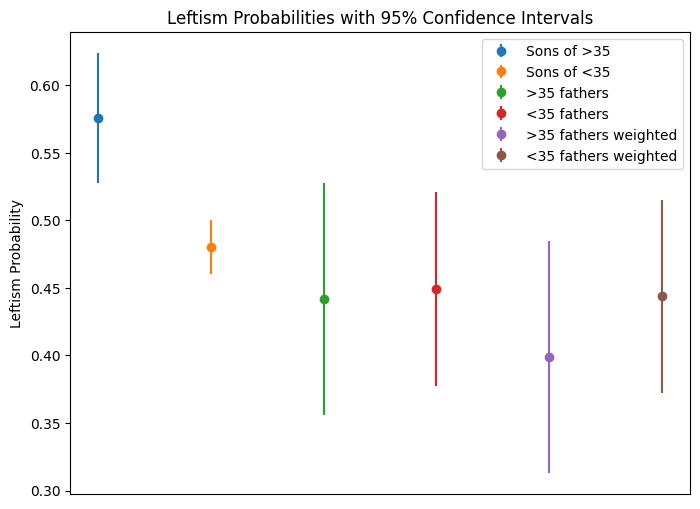

In [29]:
OVER35SONS = .576 #hardcoded from the other dataset
UNDER35SONS = .48
OVER35SONSSE = 0.048
UNDER35SONSSE = 0.02

# Let's suppose these are your probabilities and confidence intervals
probs = np.array([OVER35SONS, UNDER35SONS, OVER35FATHERS, UNDER35FATHERS, OVER35FATHERSWEIGHTED, UNDER35FATHERSWEIGHTED])
conf_intervals = np.array([OVER35SONSSE, UNDER35SONSSE, OVER35FATHERSSE, UNDER35FATHERSSE, OVER35FATHERSSE, UNDER35FATHERSSE])
labels = ['Sons of >35', 'Sons of <35', '>35 fathers', '<35 fathers', '>35 fathers weighted', '<35 fathers weighted']

# Create an array of x values - it's just an index for your four probabilities
x = np.arange(len(probs))

# Create the scatter plot with error bars
plt.figure(figsize=(8, 6))
for i in range(len(probs)):
    plt.errorbar(x[i], probs[i], yerr=conf_intervals[i], fmt='o', label=labels[i])

# Remove x-axis labels
plt.gca().axes.get_xaxis().set_ticks([])

# Add y label, legend and title
plt.ylabel('Leftism Probability')
plt.legend(loc='best')
plt.title('Leftism Probabilities with 95% Confidence Intervals')

# Show the plot
plt.show()

In [31]:
df2 = df[ df['>35 kids'] > 0] #>35 fathers
df3 = df[ df['<35 kids'] > 0] #<35 fathers
df2['WeightedWoke'] = df2['>35 kids'] * df2['wifeLeftism']
df3['WeightedWoke'] = df3['<35 kids'] * df3['wifeLeftism']
oldMean = df2['WeightedWoke'].sum() / df2['>35 kids'].sum()
oldSE = df2['Leftism'].sem()
youngMean = df3['WeightedWoke'].sum() / df3['<35 kids'].sum()
youngSE = df3['Leftism'].sem()

over35WivesWeighted = oldMean
under35WivesWeighted = youngMean
over35WivesWeightedSE = oldSE * 1.96
under35WivesWeightedSE = youngSE * 1.96

print("P(Woke|>35) = {} [{}, {}] n={}".format(oldMean, oldMean - (1.96*oldSE), oldMean + (1.96*oldSE), len(df2['Leftism'])  ))
print("P(Woke|<35) = {} [{}, {}] n={}".format(youngMean, youngMean - (1.96*youngSE), youngMean + (1.96*youngSE), len(df3['Leftism'])  ))

P(Woke|>35) = 0.5070422535211268 [0.42100925646804144, 0.5930752505742121] n=129
P(Woke|<35) = 0.5619596541786743 [0.49047443582249567, 0.6334448725348529] n=187


/var/folders/2w/sy40wmhs0zs6mfg2mnj_7qlh0000gn/T/ipykernel_41709/407475904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['WeightedWoke'] = df2['>35 kids'] * df2['wifeLeftism']
/var/folders/2w/sy40wmhs0zs6mfg2mnj_7qlh0000gn/T/ipykernel_41709/407475904.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['WeightedWoke'] = df3['<35 kids'] * df3['wifeLeftism']


In [32]:
df2 = df[ df['>35 kids'] > 0] #>35 fathers
df3 = df[ df['<35 kids'] > 0] #<35 fathers
oldMean = df2['wifeLeftism'].mean()
oldSE = df2['wifeLeftism'].sem()
youngMean = df3['wifeLeftism'].mean()
youngSE = df3['wifeLeftism'].sem()

over35Wives = oldMean
under35Wives = youngMean
over35WivesSE = oldSE * 1.96
under35WivesSE = youngSE * 1.96

print("P(Woke|>35) = {} [{}, {}] n={}".format(oldMean, oldMean - (1.96*oldSE), oldMean + (1.96*oldSE), len(df2['Leftism'])  ))
print("P(Woke|<35) = {} [{}, {}] n={}".format(youngMean, youngMean - (1.96*youngSE), youngMean + (1.96*youngSE), len(df3['Leftism'])  ))

P(Woke|>35) = 0.5581395348837209 [0.4721065378306356, 0.6441725319368062] n=129
P(Woke|<35) = 0.5721925133689839 [0.5010883754936362, 0.6432966512443317] n=187


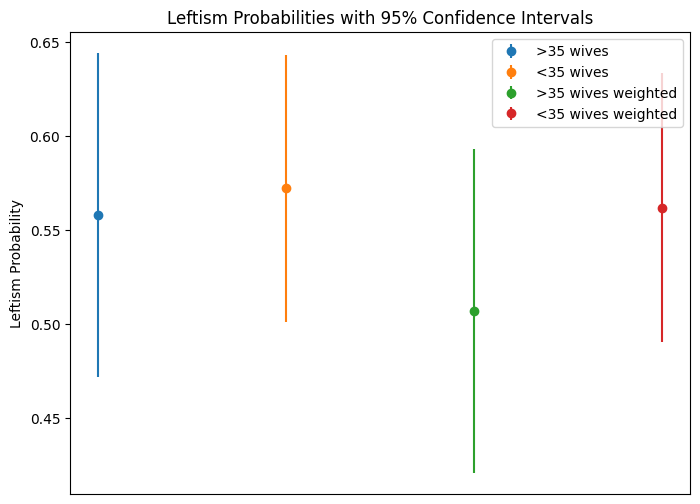

In [33]:
# Let's suppose these are your probabilities and confidence intervals
probs = np.array([over35Wives, under35Wives, over35WivesWeighted, under35WivesWeighted])
conf_intervals = np.array([over35WivesSE, under35WivesSE, over35WivesWeightedSE, under35WivesWeightedSE])
labels = [ '>35 wives', '<35 wives', '>35 wives weighted', '<35 wives weighted']

# Create an array of x values - it's just an index for your four probabilities
x = np.arange(len(probs))

# Create the scatter plot with error bars
plt.figure(figsize=(8, 6))
for i in range(len(probs)):
    plt.errorbar(x[i], probs[i], yerr=conf_intervals[i], fmt='o', label=labels[i])

# Remove x-axis labels
plt.gca().axes.get_xaxis().set_ticks([])

# Add y label, legend and title
plt.ylabel('Leftism Probability')
plt.legend(loc='best')
plt.title('Leftism Probabilities with 95% Confidence Intervals')

# Show the plot
plt.show()